<a href="https://colab.research.google.com/github/arwakhalidw/2024-GP-Group6/blob/main/AlzheimerPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
!pip install mrmr_selection
from mrmr import mrmr_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif

In [2]:
# @title Reading and Copying the Dataset
# Read the dataset
dataset = pd.read_csv("alzheimer.csv")
# Copy the dataset
dataframe = dataset.copy() # to keep the original dataset unchanged

There are 10 features, they are as follows:
1.  Group is the Class lable
2.  M/F the gender of the patients
3.  Age is the Age of the patient
4.  EDUC are Years of Education
5.  SES are Socioeconomic Status on a scale from 1 to 5
6.  MMSE is Mini Mental State Examination
7.  CDR is Clinical Dementia Rating
8.  eTIV is Estimated total intracranial volume
9.  nWBV is Normalize Whole Brain Volume
10.  ASF is Atlas Scaling Factor







In [3]:
# @title Check the Data Shape
dataframe.shape

(373, 10)

In [4]:
# @title Display the First 5 Rows
dataframe.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
# @title Describe the Numeric Values in the Dataset
dataframe.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# Visualization

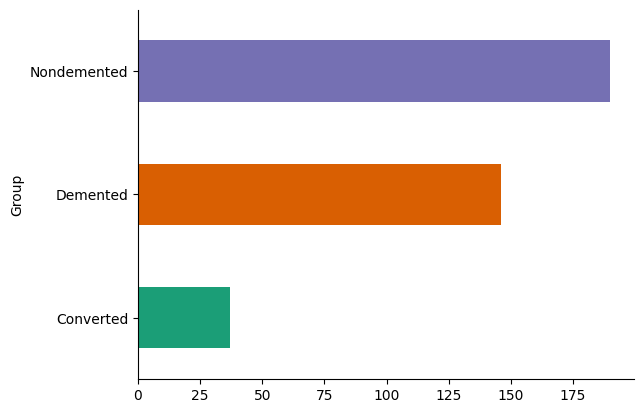

In [6]:
# @title Group

dataframe.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

we have three categories:
1. Demented:
which is a lable given to patients with Alzhiemer
2. Nondemented:
which is a lable given to patients without Alzhiemer
3. Converted:
which is a lable given to patients diagnosed first to not have Alzhiemer but were converted to be patients with Alzhiemer

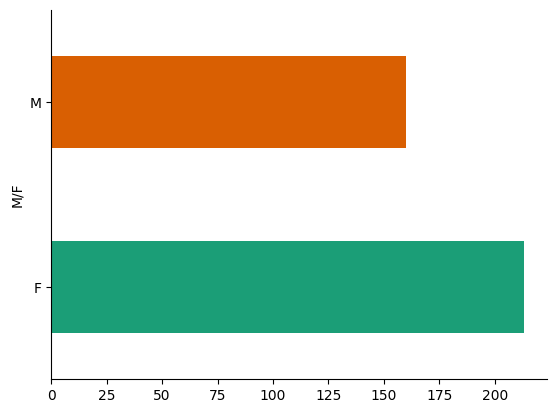

In [7]:
# @title M/F

dataframe.groupby('M/F').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

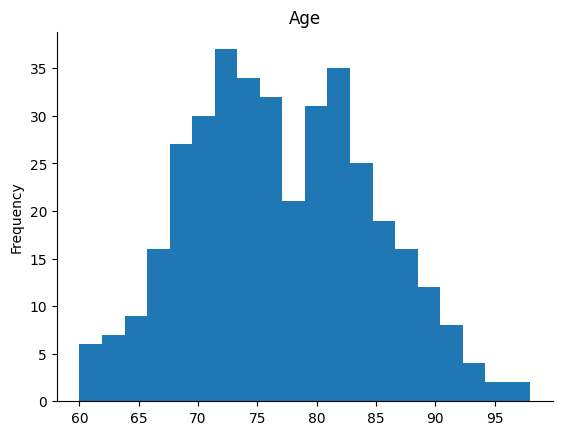

In [8]:
# @title Age

dataframe['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

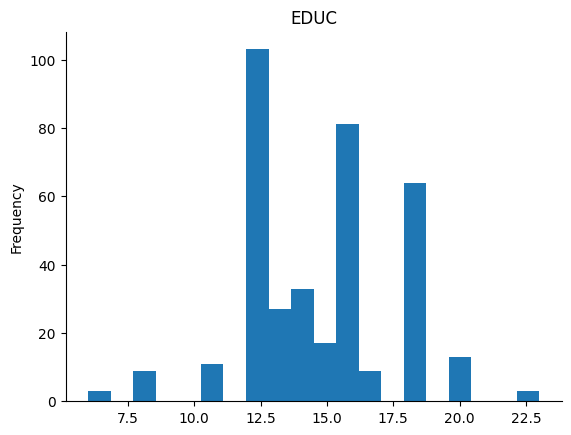

In [9]:
# @title EDUC

dataframe['EDUC'].plot(kind='hist', bins=20, title='EDUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

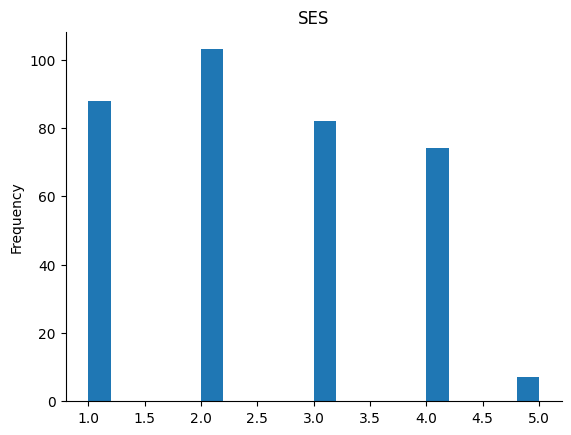

In [10]:
# @title SES

dataframe['SES'].plot(kind='hist', bins=20, title='SES')
plt.gca().spines[['top', 'right',]].set_visible(False)

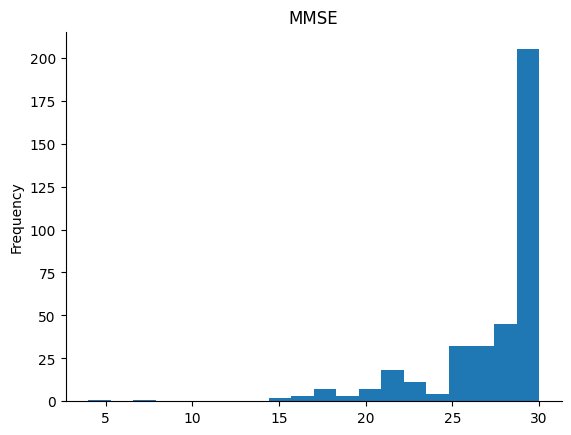

In [11]:
# @title MMSE

dataframe['MMSE'].plot(kind='hist', bins=20, title='MMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

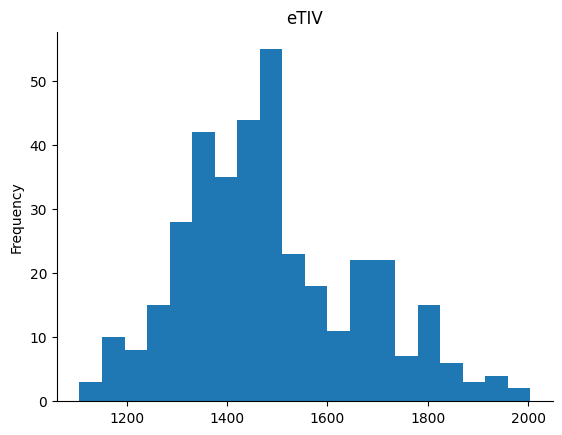

In [12]:
# @title eTIV

dataframe['eTIV'].plot(kind='hist', bins=20, title='eTIV')
plt.gca().spines[['top', 'right',]].set_visible(False)

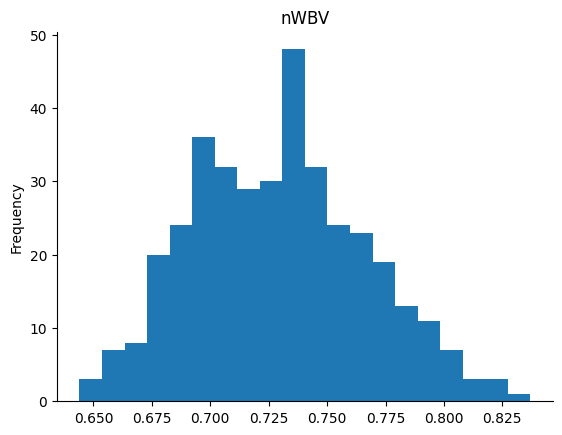

In [13]:
# @title nWBV

dataframe['nWBV'].plot(kind='hist', bins=20, title='nWBV')
plt.gca().spines[['top', 'right',]].set_visible(False)

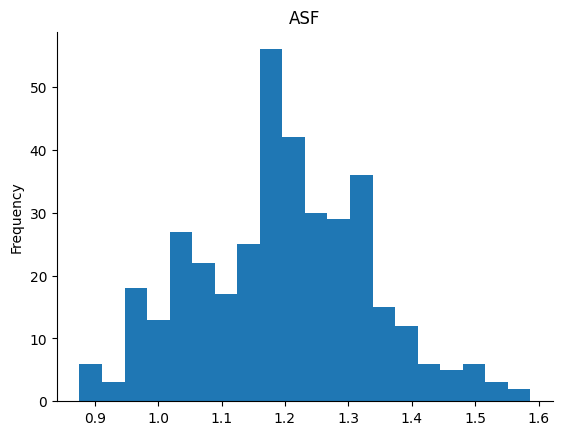

In [14]:
# @title ASF

dataframe['ASF'].plot(kind='hist', bins=20, title='ASF')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Changing The converted records to be demented

In [15]:
for index, row in dataframe.iterrows():
  if row['Group'] == 'Converted':
    dataframe.at[index, 'Group'] = 'Demented'

conuter = dataframe['Group'].value_counts()
print(conuter)

Nondemented    190
Demented       183
Name: Group, dtype: int64


# Data Cleaning


## Outlier Detection

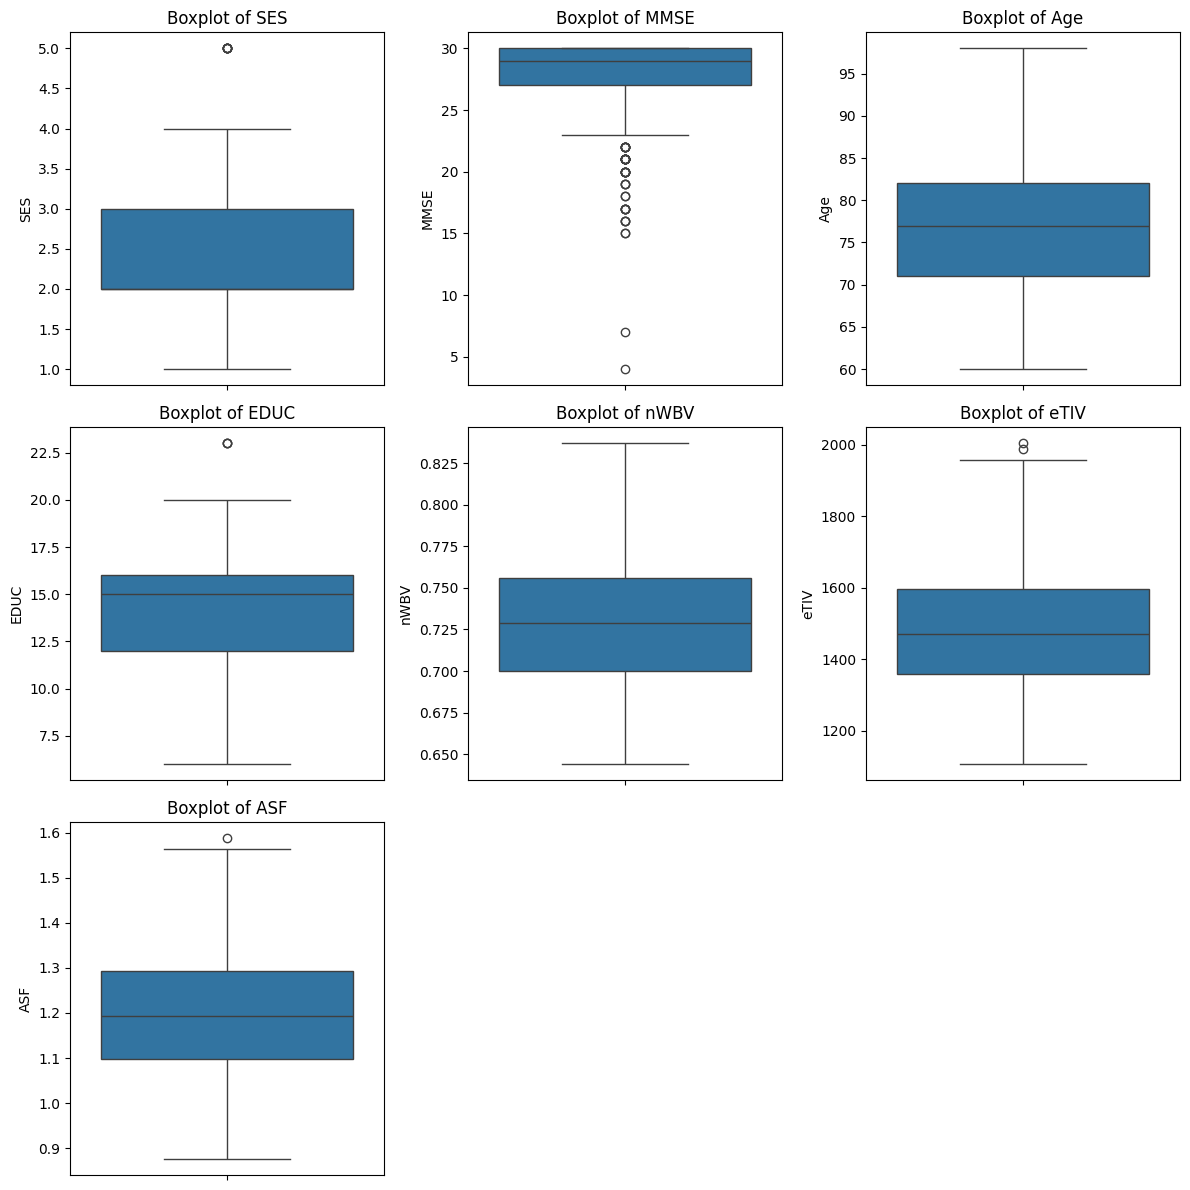

In [16]:
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']
std_dev=3

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataframe[feature])
    plt.title(f'Boxplot of {feature}')


# Adjust layout to prevent overlapping of subplots
plt.tight_layout()




## Outlier Removal

Number of rows after outlier removal: 361


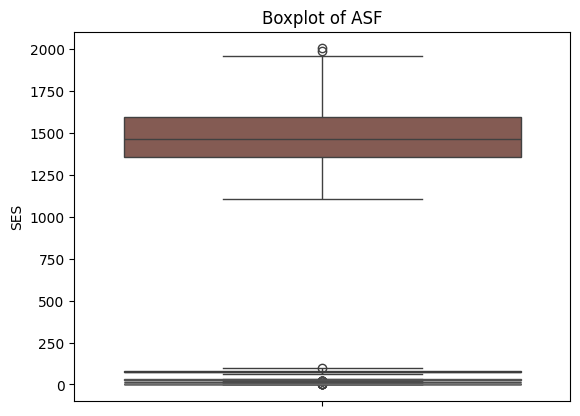

In [17]:
for i, feature in enumerate(numeric_features, 1):
  Q1 = dataframe[feature].quantile(0.25)
  Q3 = dataframe[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - std_dev * IQR
  upper_bound = Q3 + std_dev * IQR

 # Remove outliers
  outliers = (dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)
  dataframe = dataframe[~outliers]

  sns.boxplot(data=dataframe[feature])
  plt.title(f'Boxplot of {feature}')

print("Number of rows after outlier removal:", len(dataframe))

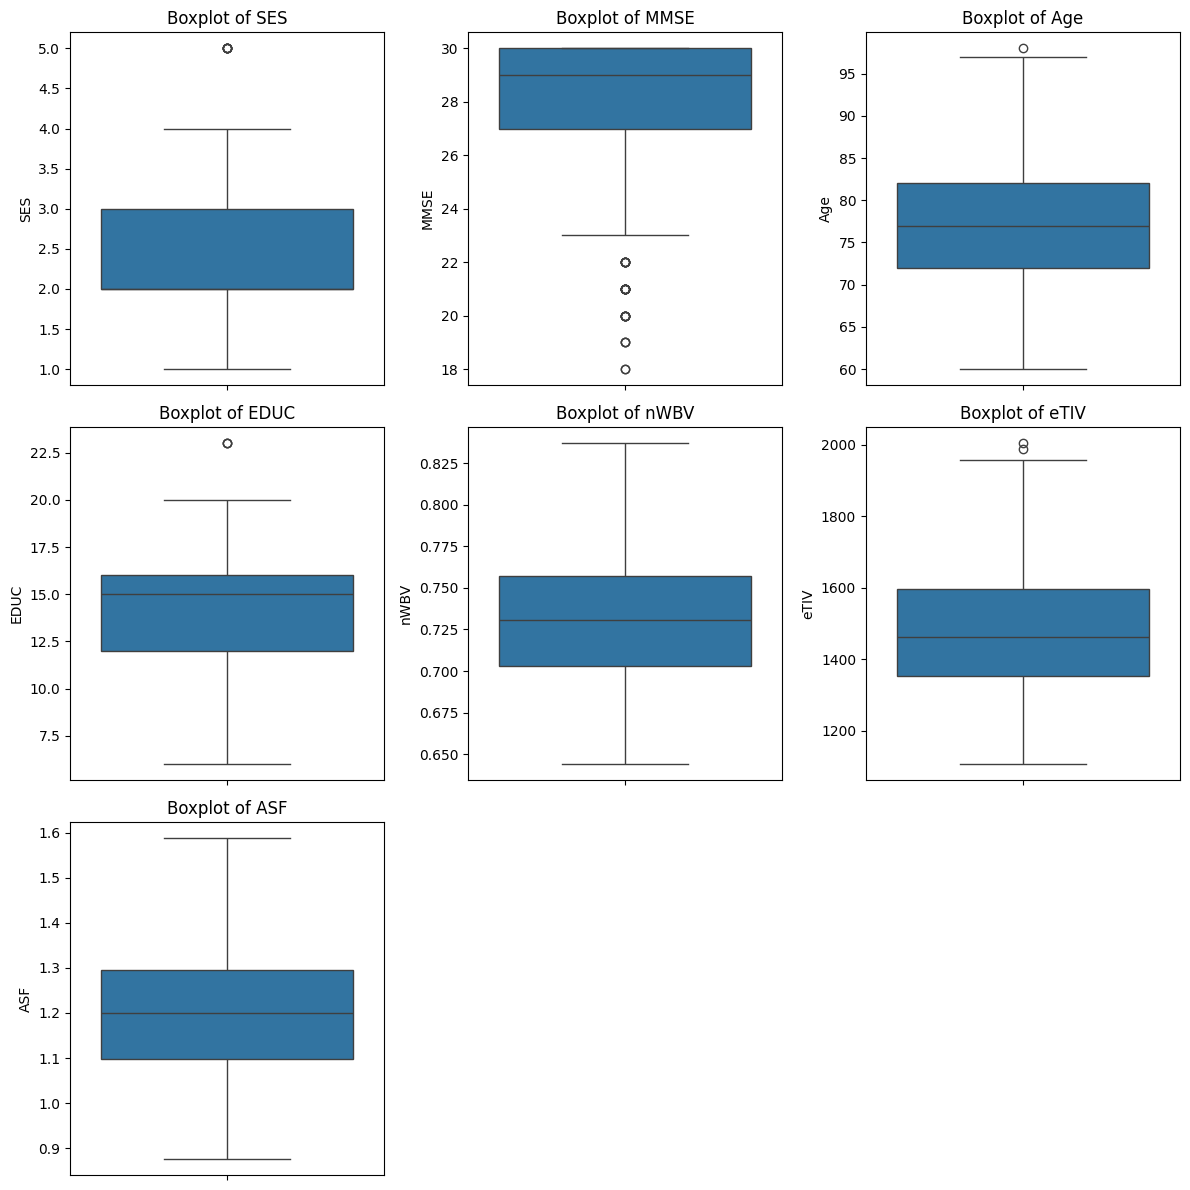

In [18]:
plt.figure(figsize=(12, 12))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(data=dataframe[feature])
  plt.title(f'Boxplot of {feature}')
plt.tight_layout()

## Handeling Missing Values

In [19]:
# @title Check if Any Column has Null values in the Dataset
dataframe.isnull().any()

Group    False
M/F      False
Age      False
EDUC     False
SES       True
MMSE      True
CDR      False
eTIV     False
nWBV     False
ASF      False
dtype: bool

As displayed, the SES and MMSE columns contain missing values. First, we'll check whether or not the data for these columns is normally distrubuted using the Shapiro-Wilk test.

In [20]:
stat, p_value = shapiro(dataframe['SES'])

print('Shapiro-Wilk test for SES:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

stat, p_value = shapiro(dataframe['MMSE'])

print('Shapiro-Wilk test for MMSE:')
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")


## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)


Shapiro-Wilk test for SES:
The data appears to be normally distributed.
Shapiro-Wilk test for MMSE:
The data appears to be normally distributed.


In [21]:
## Since the data in both columns is normally distributed, we can either perform median or mean imputation.
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)

## Check for missing values again
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

# Exploratory Dataset Analysis



##Univariate Analysis

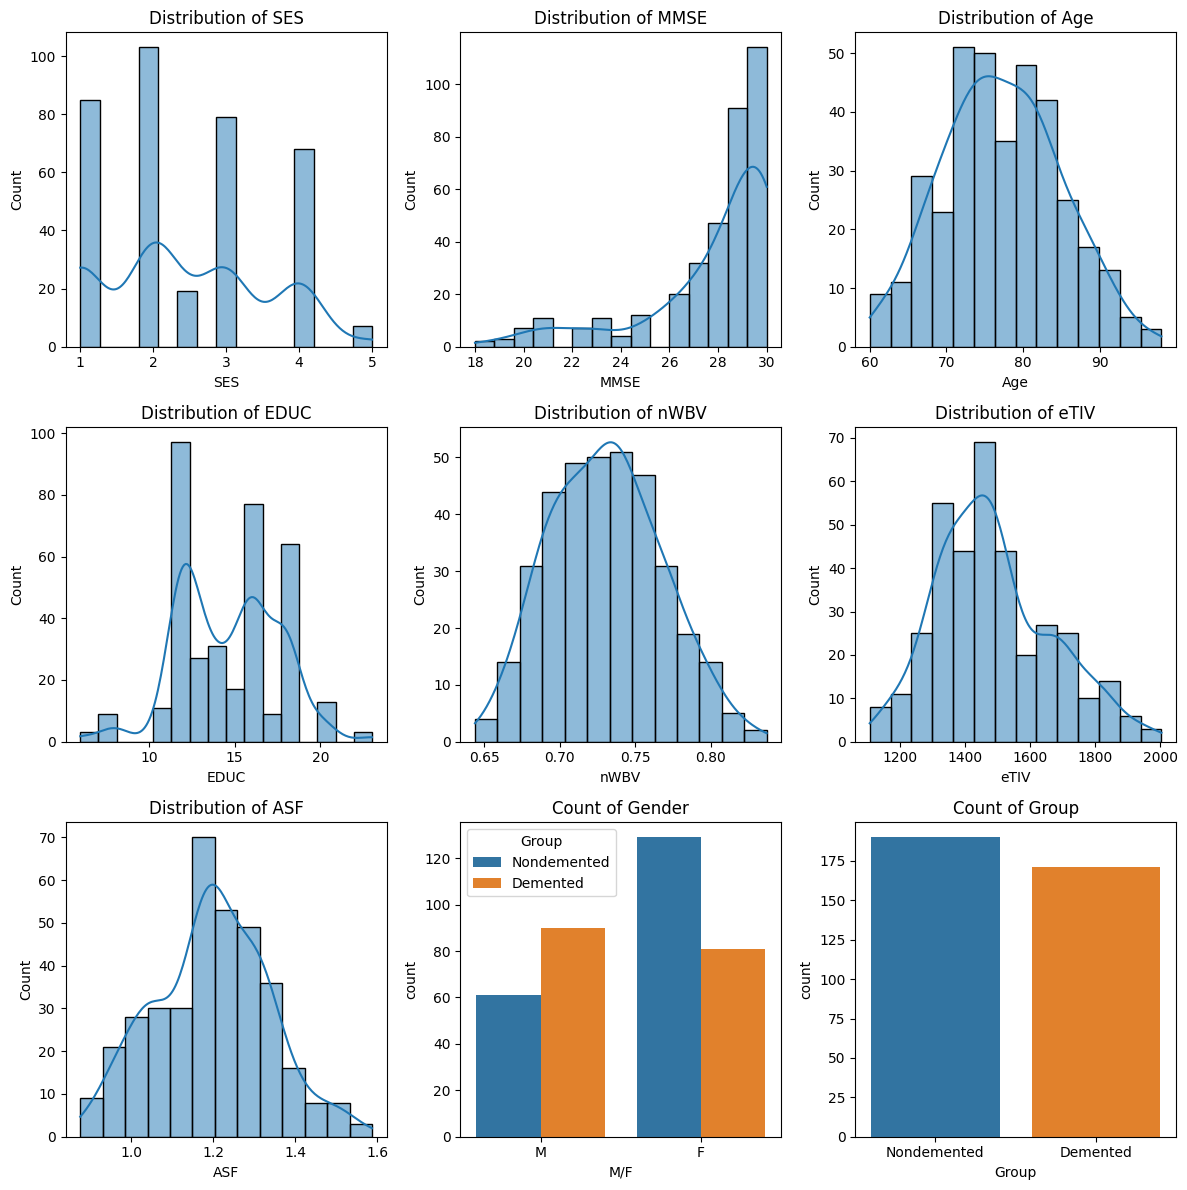

In [22]:
## Numeric Values
numeric_features = ['SES', 'MMSE', 'Age', 'EDUC', 'nWBV', 'eTIV', 'ASF']

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')

## Categorical Values

plt.subplot(3, 3, 8)
sns.countplot(data=dataframe, x=dataframe['M/F'], hue='Group')
plt.title(f'Count of Gender')

plt.subplot(3, 3, 9)
sns.countplot(data=dataframe, x=dataframe['Group'], hue='Group')
plt.title(f'Count of Group')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show plot
plt.show()


 ## Bivariate Analysis

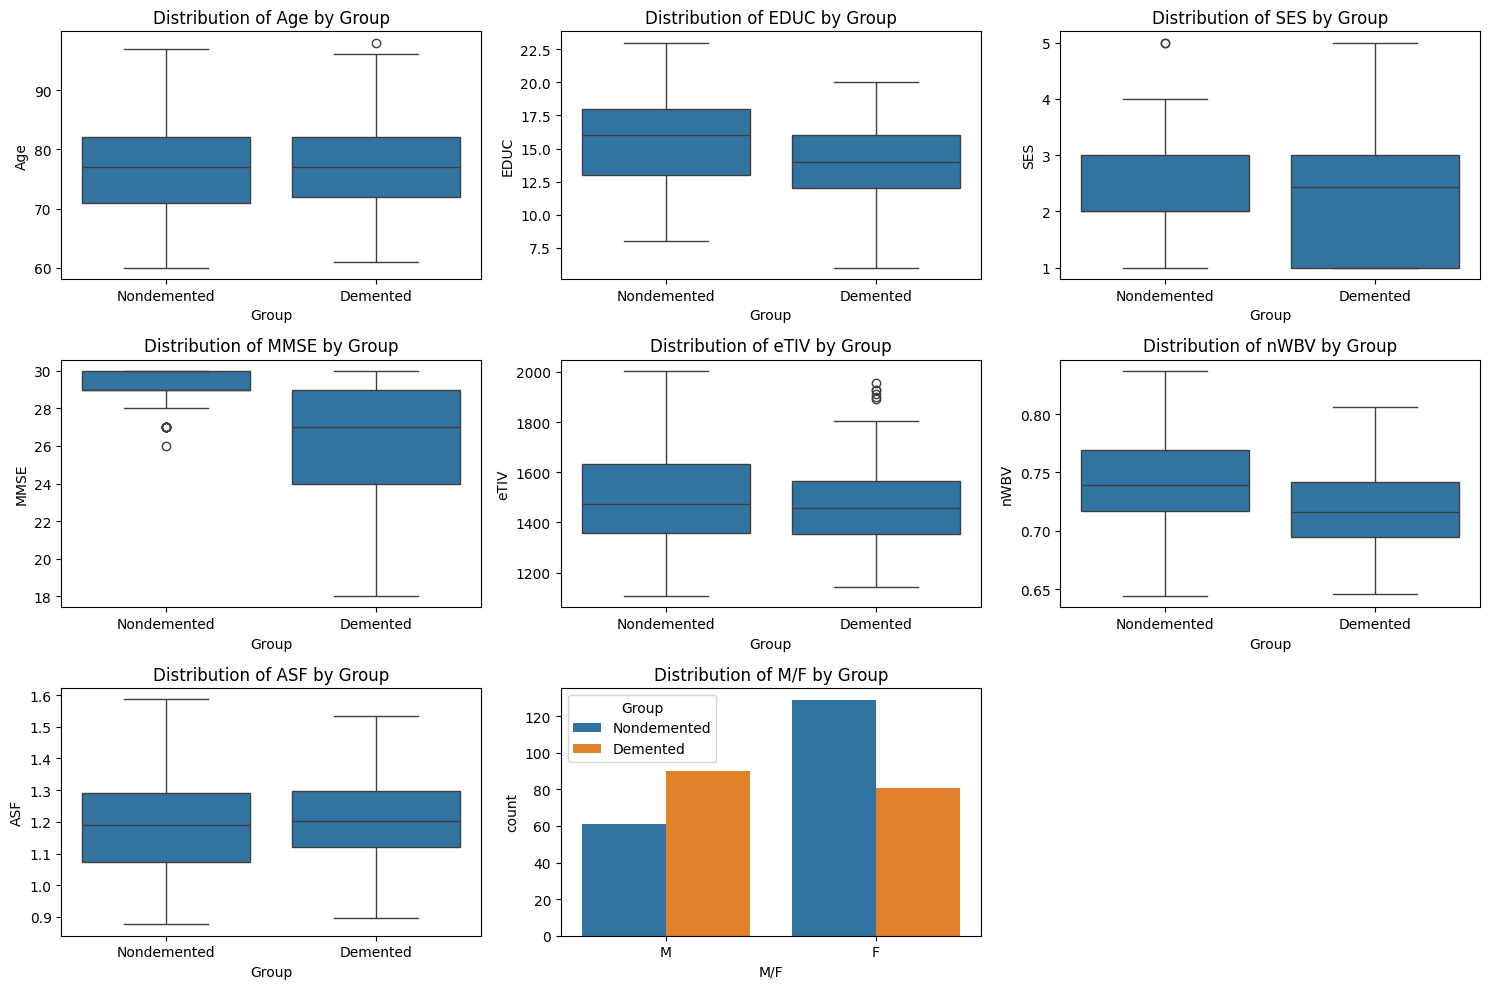

In [23]:
# Select numeric columns (excluding the 'group' column)
numeric_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.figure(figsize=(15, 10))

# Plot each numeric column against the 'group' column
for i, column in enumerate(numeric_columns,1):

    plt.subplot(3, 3, i)
    sns.boxplot(x='Group', y=column, data=dataframe)
    plt.title(f'Distribution of {column} by Group')
    plt.xlabel('Group')
    plt.ylabel(column)


plt.subplot(3, 3, 8)
sns.countplot(x=dataframe['M/F'], hue='Group', data=dataframe)
plt.title(f'Distribution of M/F by Group')
plt.legend(title='Group')

plt.tight_layout()
plt.show()




# Encoding

Encoding the M/F attribute to be 0 for M (male) and 1 for F (female) and the Group attribute to be 0 for Demented and 1 for Nondemented

In [24]:
Columns = ["Group","M/F"]
encode = LabelEncoder()
for i in Columns:
    dataframe[i] = encode.fit_transform(dataframe[i])
    print(dataframe[i].value_counts())
    print("------------------------")

1    190
0    171
Name: Group, dtype: int64
------------------------
0    210
1    151
Name: M/F, dtype: int64
------------------------


# Removing CDR attribute

In [25]:
dataframe = dataframe.drop(columns=['CDR'])

# Feature Selection

### Applying mRMR technique

In [26]:
mrmr_data = dataframe.drop(columns=['Group'])
mrmr_target = dataframe['Group']

mrmr_data = pd.get_dummies(mrmr_data, columns= mrmr_data.select_dtypes(include=['object']).columns)

mrmr_selected_features = mrmr_classif(X=mrmr_data, y=mrmr_target, K=5)

print("Selected features:", mrmr_selected_features)

100%|██████████| 5/5 [00:00<00:00, 14.04it/s]

Selected features: ['MMSE', 'M/F', 'nWBV', 'EDUC', 'eTIV']


As shown the mRMR (minimum Redundancy Maximum Relevance) teqhuniqe chose the following columns: CDR, MMSE, M/F, EDUC, nWBV

we will apply Correlation Coefficient to further assesst the result

### Applying Correlation Coefficient

In [27]:
# Find the pearson correlations matrix
corr = dataframe.corr(method = 'pearson')

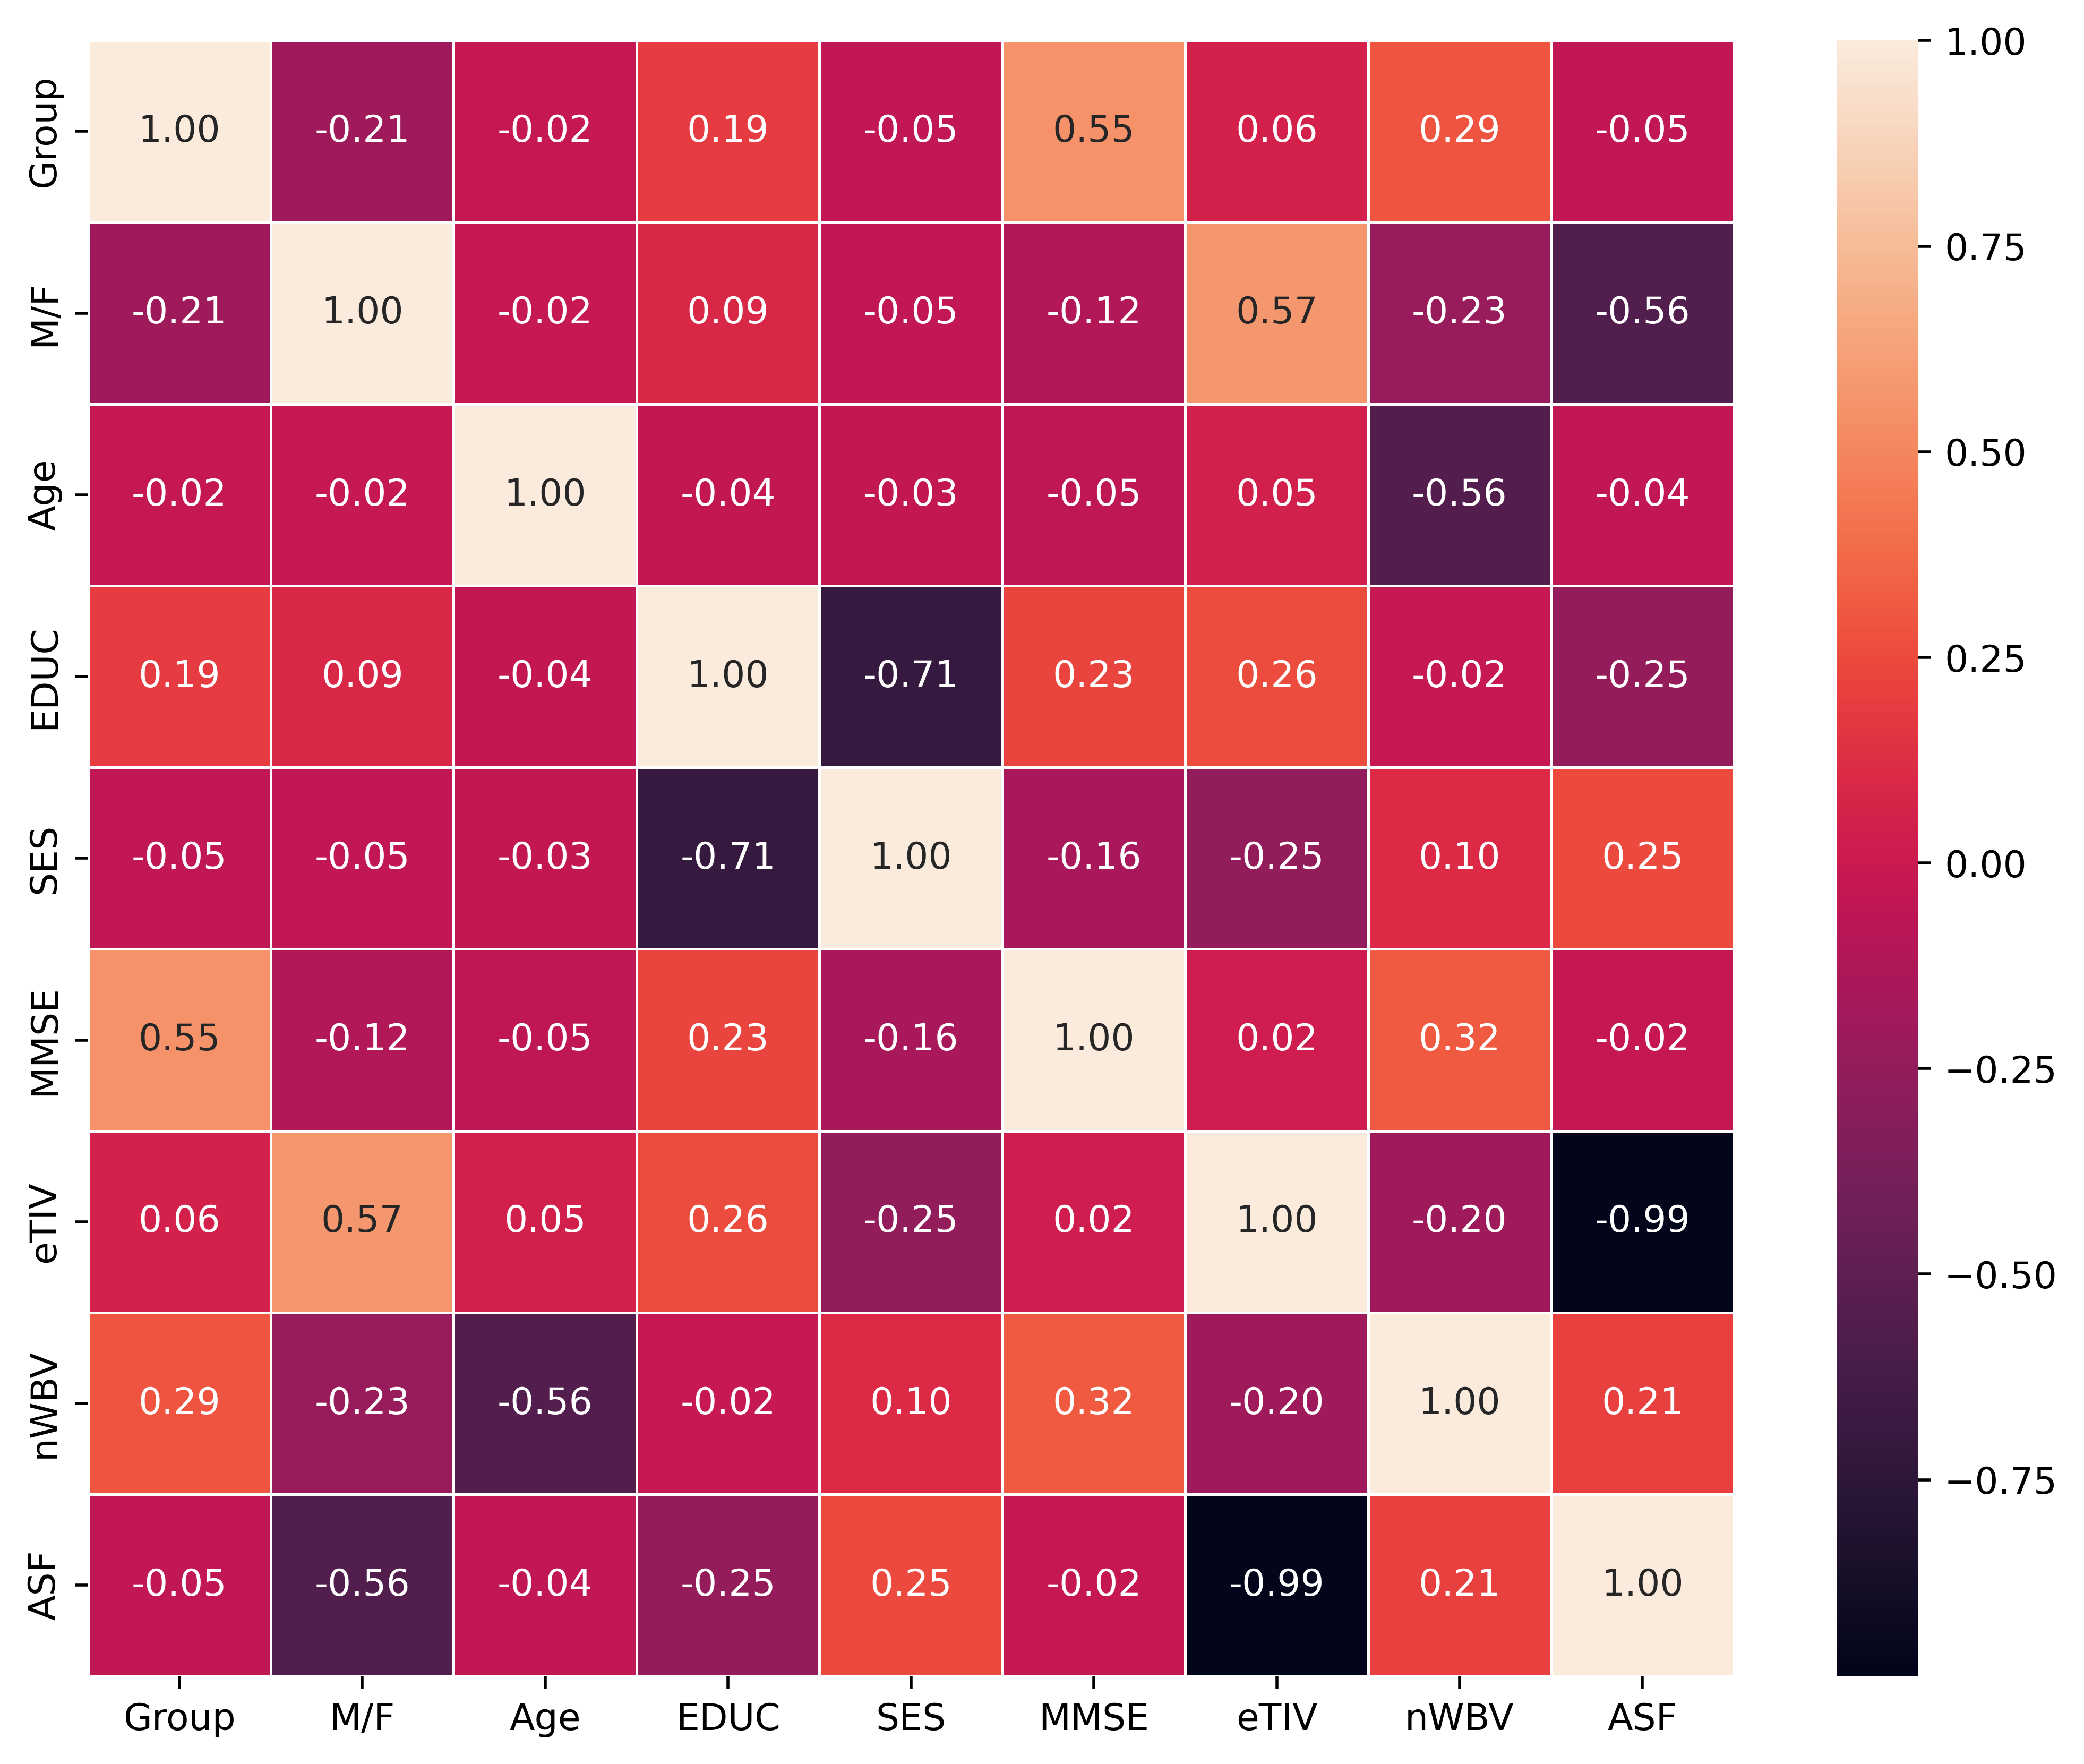

In [28]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

the map futrher affirms the results of the mRMR teqhuniqe, therefore, we will remove the irrelevant features.

### Applying information gain

In [29]:
igX_train,igX_test,igy_train,igy_test=train_test_split(dataframe.drop(labels=['Group'], axis=1),
    dataframe['Group'],
    test_size=0.3,
    random_state=0)
mutual_info = mutual_info_classif(igX_train, igy_train)
mutual_info

array([0.01281402, 0.        , 0.02063627, 0.0501388 , 0.21368855,
       0.05274331, 0.12381927, 0.05700761])

In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = igX_train.columns
mutual_info.sort_values(ascending=False)

MMSE    0.213689
nWBV    0.123819
ASF     0.057008
eTIV    0.052743
SES     0.050139
EDUC    0.020636
M/F     0.012814
Age     0.000000
dtype: float64

<Axes: >

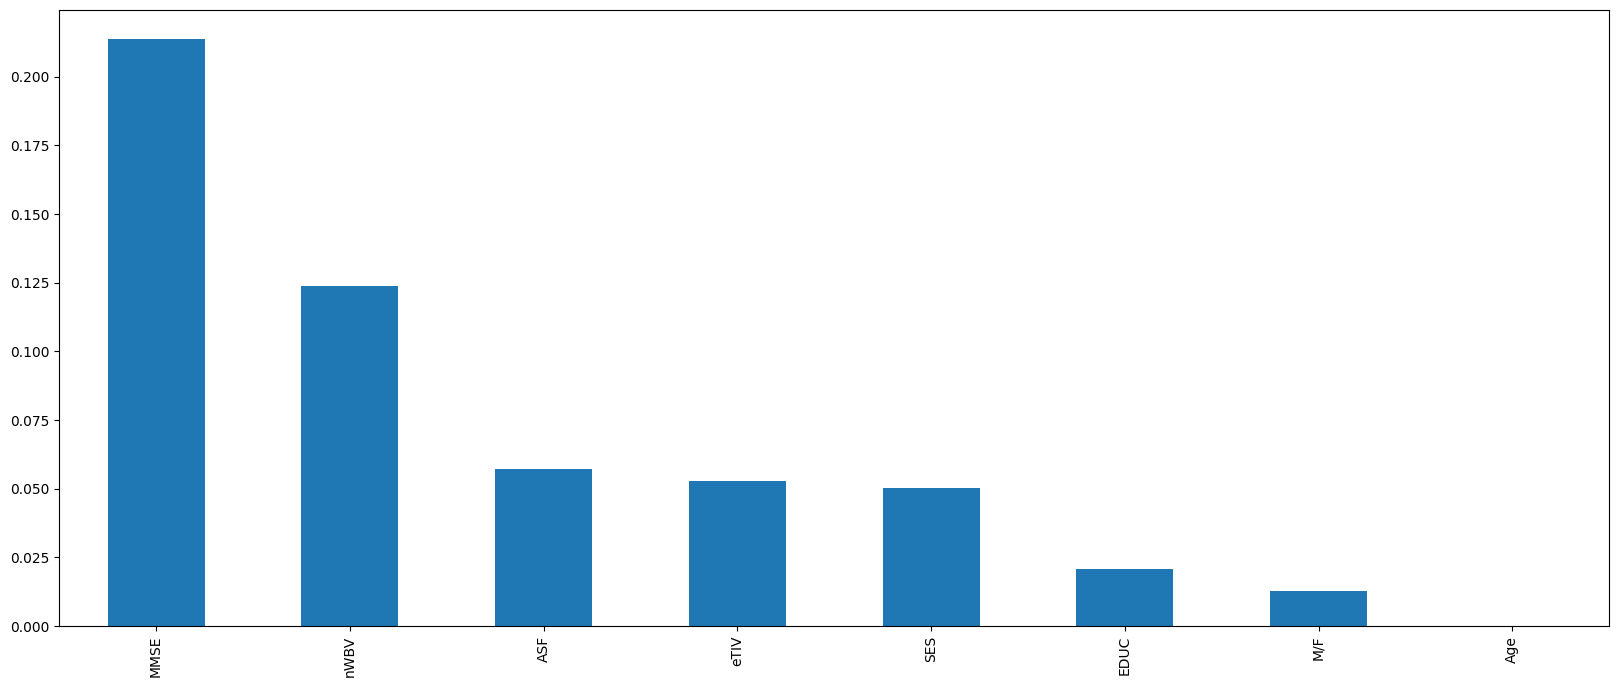

In [31]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

As shown the information gain teqhuniqe suggests the following columns (in descending order): MMSE, SES, nWBV, eTIV, ASF, EDUC, M/F, Age.

we will choose the top 5 columns which are: MMSE, SES, nWBV, eTIV, ASF.


# Removing Irrelevant features

# mRMR teqhnuiqe

In [32]:
mrmr_dataframe_selected_features = dataframe[['Group'] + mrmr_selected_features ]
mrmr_dataframe_selected_features.head()

,Group,MMSE,M/F,nWBV,EDUC,eTIV
0,1,27.0,1,0.696,14,1987
1,1,30.0,1,0.681,14,2004
2,0,23.0,1,0.736,12,1678
3,0,28.0,1,0.713,12,1738
4,0,22.0,1,0.701,12,1698


# information gain teqhuniqe

In [36]:
infog_dataframe_selected_features = dataframe[['Group'] + ['MMSE'] + ['SES'] + ['nWBV'] + ['eTIV'] + ['ASF']]
infog_dataframe_selected_features.head()

,Group,MMSE,SES,nWBV,eTIV,ASF
0,1,27.0,2.00000,0.696,1987,0.883
1,1,30.0,2.00000,0.681,2004,0.876
2,0,23.0,2.44152,0.736,1678,1.046
3,0,28.0,2.44152,0.713,1738,1.010
4,0,22.0,2.44152,0.701,1698,1.034


# machine learning model

## SVM Model (no feature selection)

In [37]:
# Split dataset into training set and test set
svmXall_train, svmXall_test, svmyall_train, svmyall_test = train_test_split(dataframe.drop(columns=['Group']), dataframe['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [41]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXall_train, svmyall_train)

#Predict the response for test dataset
svmyall_pred = clf.predict(svmXall_test)

In [42]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmyall_test, svmyall_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmyall_test, svmyall_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmyall_test, svmyall_pred))

Accuracy: 0.8440366972477065
Precision: 0.8461538461538461
Recall: 0.8870967741935484


# SVM mRMR

In [43]:
# Split dataset into training set and test set
svmXmrmr_train, svmXmrmr_test, svmymrmr_train, svmymrmr_test = train_test_split(mrmr_dataframe_selected_features.drop(columns=['Group']), mrmr_dataframe_selected_features['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [44]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXmrmr_train, svmymrmr_train)

#Predict the response for test dataset
svmymrmr_pred = clf.predict(svmXmrmr_test)

In [45]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmymrmr_test, svmymrmr_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmymrmr_test, svmymrmr_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmymrmr_test, svmymrmr_pred))

Accuracy: 0.8165137614678899
Precision: 0.8088235294117647
Recall: 0.8870967741935484


# SVM information gain

In [47]:
# Split dataset into training set and test set
svmXig_train, svmXig_test, svmyig_train, svmyig_test = train_test_split(infog_dataframe_selected_features.drop(columns=['Group']), infog_dataframe_selected_features['Group'], test_size=0.3,random_state=109) # 70% training and 30% test

In [48]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svmXig_train, svmyig_train)

#Predict the response for test dataset
svmyig_pred = clf.predict(svmXig_test)

In [49]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svmyig_test, svmyig_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(svmyig_test, svmyig_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(svmyig_test, svmyig_pred))

Accuracy: 0.8348623853211009
Precision: 0.8235294117647058
Recall: 0.9032258064516129
